In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as soup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen as uReq

# Taking the URL link 

In [2]:
url = 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber='

# Looping all the URL

In [7]:
url_list =[]
for i in range(1,51):
    url_list.append(url+str(i))

In [8]:
url_list[:5]

['https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=2',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=3',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=4',
 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=5']

# Creating Page_soup  for all the URLs

In [ ]:
page_soup_list = []
for i in range(len(url_list)):
    ur = url_list[i]
    uClinet = uReq(ur)
    page_html = uClinet.read()
    uClinet.close()
    page_soup =soup(page_html,'html.parser')
    page_soup_list.append(page_soup)

In [280]:
page_soup_list[0]

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="//images-eu.ssl-images-amazon.com" rel="dns-prefetch"/><link href="//m.media-amazon.com" rel="dns-prefetch"/><link href="//completion.amazon.com" rel="dns-prefetch"/><!-- sp:feature:aui-assets -->
<link href="https://m.media-amazon.com/images/I/41YNcL3lZpL._RC|51giv2WPknL.css,01evdoiemkL.css,01K+Ps1DeEL.css,31bAdTWQ3tL.css,01tgK36lpGL.css,11UGC+GXOPL.css,21LK7jaicML.css,11L58Qpo0GL.css,21EuGTxgpoL.css,01Xl9KigtzL.css,01YhS3Cs-hL.css,21GwE3cR-yL.css,019SHZnt8RL.css,01wAWQRgXzL.css,21bWcRJYNIL.css,11WgRxUdJRL.css,01dU8+SPlFL.css,11ocrgKoE-L.css,01SHjPML6tL.css,111-D2qRjiL.css,01QrWuRrZ-L.css,310Imb6LqFL.css,11Z1a0FxSIL.css,01cbS3UK11L.css,21mOLw+nYYL.css,01L8Y-JFEhL.css_.css?AUIClients/Amaz

# Extracting Ratings alone from the page_content

In [17]:
rating = []
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rat = i.find_all('span',{'class':'a-icon-alt'})
    for i in range(3,len(rat)-5):
        rating.append(rat[i].text.split(' ')[0])    

In [18]:
len(rating)

500

# Extracting Reviews and Title from Each user

In [19]:
r2=['','Report abuse','\nThere was a problem loading comments right now. Please try again later.','\n',
    'Select the department you want to search in','© 1996-2019, Amazon.com, Inc. or its affiliates']
n =[]
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rev = i.find_all('span',{'class':''})
    r =[]
    for j in rev:
        r.append(j.text)
    for k in r:
        if k not in r2:
            n.append(k)

In [20]:
review=[]
title=[]
for i in range(0,len(n)):
    if i%2==1:
        review.append(n[i])
    if i%2==0:
        title.append(n[i])

Creating Dataframe and appending all the extracted columns

In [83]:
final = pd.DataFrame([title,review,rating],index=['Title','Review','Rating'])
final = final.T

In [84]:
final.head()

,Title,Review,Rating
0,Best Phone,its best android phone .,5.0
1,Flagship killer,"Excellent, real flagship killer",5.0
2,Alert Slider not working Properly,Alert Slider at the first Day is not working p...,3.0
3,Worth every penny!!,This device gives you all you can ask from a p...,5.0
4,Camera not good,Cam clarity is very bad,2.0


In [23]:
final.to_csv('Oneplus6T-Review.csv',header=True)

# Word Cloud For Oneplus 6T Reviews

In [195]:
x = final['Review']

In [196]:
import re

In [197]:
x[0:5]

0                             its best android phone .
1                      Excellent, real flagship killer
2    Alert Slider at the first Day is not working p...
3    This device gives you all you can ask from a p...
4                              Cam clarity is very bad
Name: Review, dtype: object

In [198]:
x  = ' '.join(x)

In [199]:
x = re.sub('[0-9]','',x)

In [200]:
from nltk.tokenize import RegexpTokenizer

In [201]:
tokenizer = RegexpTokenizer(r'\w+')

In [202]:
x = tokenizer.tokenize(x)

In [203]:
from nltk.corpus import stopwords

In [204]:
en_stops = stopwords.words('english')
en_stops.append('got')
en_stops.append('day')
en_stops.append('even')
en_stops.append('go')
en_stops.append('time')
en_stops.append('product')
a = [ i for i in x if i not in en_stops]

In [205]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [206]:
c=[]
for i in a:
    c.append(lemm.lemmatize(i))   

In [207]:
c = ' '.join(c)

In [208]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

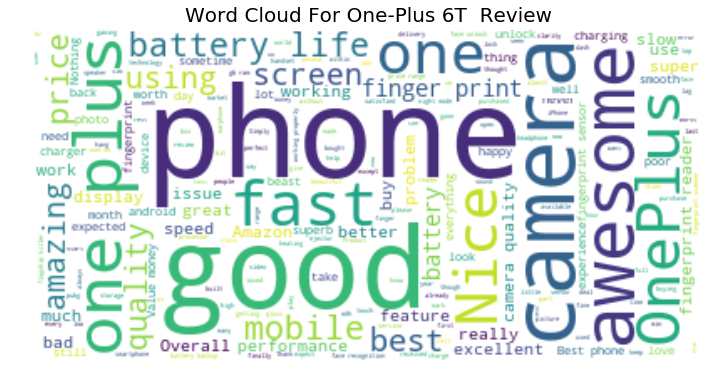

In [209]:
wordcloud = WordCloud(background_color='white').generate(c)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For One-Plus 6T  Review',{'fontsize':20},loc ='center')
plt.show()

In [210]:
from textblob import TextBlob

In [239]:
x = final['Review']
s=[]

In [240]:
for i in range(len(x)):
    analysis = TextBlob(x[i])
    #print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        s.append( 'Positive')
    else:
        s.append('Negative')

In [241]:
s = pd.Series(s)

In [242]:
Sentiment = pd.DataFrame([x,s],index=['Review','Sentiment'])

In [246]:
Sentiment = Sentiment.T

In [249]:
Sentiment.head(25)

,Review,Sentiment
0,its best android phone .,Positive
1,"Excellent, real flagship killer",Positive
2,Alert Slider at the first Day is not working p...,Negative
3,This device gives you all you can ask from a p...,Positive
4,Cam clarity is very bad,Negative
5,Finger print sensor can be good,Positive
6,Didn't receive the bill with the product and t...,Negative
7,The fingerprint reader is a joke,Negative
8,Phone is good but i was expecting very good qu...,Positive
9,Best in the market! I neva thought Android was...,Positive


In [262]:
count =Sentiment.groupby('Sentiment').count()
count

,Review
Sentiment,
Negative,150
Positive,350


In [264]:
Negative_count = count.Review[0]
Positive_count = count.Review[1]

In [282]:
print('Positive Review percentage for ONE-PLUS 6T is :',((Positive_count/(Positive_count + Negative_count))*100),'%')
print('Negative Review percentage for ONE-PLUS 6T is :',((Negative_count/(Positive_count + Negative_count))*100),'%')

Positive Review percentage for ONE-PLUS 6T is : 70.0 %
Negative Review percentage for ONE-PLUS 6T is : 30.0 %
